##Python installations

In [4]:
!pip install pandas==2.1.3
!pip install nltk==3.6.5
!pip install scikit-learn==1.3.2
!pip install scipy==1.11.4
!pip install threadpoolctl==3.2.0
!pip install tensorflow==2.8.0

##Imports

In [5]:
###Imports
##Collecting data
import pandas as pd

##Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
##Regular functions
import re

##DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
nltk.download('stopwords')
nltk.download('punkt')

#RNN
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Gather the dataset for sentiment analysis from the UCI Machine Learning Repository

In [6]:
## Read text files

file1 = pd.read_csv("amazon_cells_labelled.txt", delimiter = '\t', quoting = 3, header=None, names=["Phrase", "tag"])
file2 = pd.read_csv("imdb_labelled.txt", delimiter = '\t', quoting = 3, header=None, names=["Phrase", "tag"])
file3 = pd.read_csv("yelp_labelled.txt", delimiter = '\t', quoting = 3, header=None, names=["Phrase", "tag"])

# Concatenate the three files
combined_df = pd.concat([file1, file2, file3], ignore_index=True)

#Check the size of each read file
print(file1.shape)
print(file2.shape)
print(file3.shape)
print(combined_df.shape)

#Number of occurrences of each unique value in the 'tag' column
print(combined_df['tag'].value_counts() / combined_df['tag'].shape[0])


#Print initial combined_df
display(combined_df)



(1000, 2)
(1000, 2)
(1000, 2)
(3000, 2)
tag
0    0.5
1    0.5
Name: count, dtype: float64


,Phrase,tag
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


##Preprocess the text data, including tokenization, lowercasing, and removing stopwords.

In [7]:
# Function to clean text (regular expressions)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    return text

In [8]:
# Apply cleaning and tokenization for English words
combined_df['Cleaned_Phrase'] = combined_df['Phrase'].apply(clean_text)
combined_df['Tokenized_Phrase'] = combined_df['Cleaned_Phrase'].apply(word_tokenize)
combined_df['Tokenized_Phrase'] = combined_df['Tokenized_Phrase'].apply(lambda x: [word.lower() for word in x])

#Remove English stopwords

stop_words = set(stopwords.words('english'))
combined_df['Tokenized_Phrase'] = combined_df['Tokenized_Phrase'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the dataframe with original phrases and preprocessed English words
display(combined_df[['Phrase', 'Tokenized_Phrase']])

,Phrase,Tokenized_Phrase
0,So there is no way for me to plug it in here i...,"[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.","[good, case, excellent, value]"
2,Great for the jawbone.,"[great, jawbone]"
3,Tied to charger for conversations lasting more...,"[tied, charger, conversations, lasting, 45, mi..."
4,The mic is great.,"[mic, great]"
...,...,...
2995,I think food should have flavor and texture an...,"[think, food, flavor, texture, lacking]"
2996,Appetite instantly gone.,"[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go b...,"[overall, impressed, would, go, back]"
2998,"The whole experience was underwhelming, and I ...","[whole, experience, underwhelming, think, well..."


##Implement a DummyClassifier

In [9]:
# Assume 'X' are the preprocessed features and 'y' are the labels
X = combined_df['Tokenized_Phrase']
y = combined_df['tag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Strategy: random classification, but maintaining the original class ratio of the training set
dummy_clf = DummyClassifier(strategy="stratified")

#Train the model
dummy_clf.fit(X_train, y_train)


DummyClassifier(strategy='stratified')

###Calculate evaluation metrics (Test)

In [10]:
# Make predictions on the test set
y_pred_test = dummy_clf.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test_dummy = accuracy_score(y_test, y_pred_test)
precision_test_dummy = precision_score(y_test, y_pred_test)
recall_test_dummy = recall_score(y_test, y_pred_test)
f1_test_dummy = f1_score(y_test, y_pred_test)
kappa_test_dummy = cohen_kappa_score(y_test, y_pred_test)

# Create a dictionary with the test metrics
metrics_test = {
    'Accuracy': accuracy_test_dummy,
    'Precision': precision_test_dummy,
    'Recall': recall_test_dummy,
    'F1 Score': f1_test_dummy,
    'Kappa': kappa_test_dummy

}

# Create a DataFrame from the test metrics dictionary
metrics_df_test = pd.DataFrame(list(metrics_test.items()), columns=['Metric', 'Value'])

# Print the DataFrame
print('\n' + 'Metrics for test set' + '\n')
display(metrics_df_test)



Metrics for test set



,Metric,Value
0,Accuracy,0.490000
1,Precision,0.491857
2,Recall,0.501661
3,F1 Score,0.496711
4,Kappa,-0.020079


###Calculate evaluation metrics (Train)

In [11]:
##Calculate evaluation metrics (Train)
y_pred_train = dummy_clf.predict(X_train)

#Calculate evaluation metrics (Train)
accuracy_train_dummy = accuracy_score(y_train, y_pred_train)
precision_train_dummy = precision_score(y_train, y_pred_train)
recall_train_dummy = recall_score(y_train, y_pred_train)
f1_train_dummy = f1_score(y_train, y_pred_train)
kappa_train_dummy = cohen_kappa_score(y_train, y_pred_train)

metrics_train = {
    'Accuracy': accuracy_train_dummy,
    'Precision': precision_train_dummy,
    'Recall': recall_train_dummy,
    'F1 Score': f1_train_dummy,
    'Kappa': kappa_train_dummy
}

metrics_df_train = pd.DataFrame(list(metrics_train.items()), columns=['Metric', 'Value'])

# Show DataFrame
print('\n' + 'Metrics for train set' + '\n')
display(metrics_df_train)


Metrics for train set



,Metric,Value
0,Accuracy,0.488750
1,Precision,0.487993
2,Recall,0.474562
3,F1 Score,0.481184
4,Kappa,-0.022524


##Implement a vanilla RNN sentiment analysis model

###Tokenize text

In [12]:
# Maximum number of words to consider
max_words = 10000

# Create a Tokenizer with a specified maximum number of words
tokenizer = Tokenizer(num_words=max_words)

# Fit the Tokenizer on the training text data
tokenizer.fit_on_texts(X_train)

# Convert the training and test text data into sequences of indices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Adjust the length of the sequences to a fixed size
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

###Create RNN model

In [13]:

##Define the architecture of the model:
def create_rnn_model(units=50):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=maxlen))
    model.add(SimpleRNN(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

###Configure GridSearchCV to find the best hyperparameters

In [14]:
#Configure GridSearchCV to find the best hyperparameters
# Wrap the Keras model in a scikit-learn estimator
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=32, verbose=1)

# Configure GridSearchCV to find the best hyperparameters
param_grid = {'units': [50, 100, 150], 'batch_size': [32, 64, 128]}
grid_search = GridSearchCV(estimator=rnn_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model
grid_result = grid_search.fit(X_train_pad, y_train)


<ipython-input-14-0aa6c34d3543>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
50/50 [==============================] - 15s 188ms/step - loss: 0.6901 - accuracy: 0.5437
Epoch 2/5
50/50 [==============================] - 15s 305ms/step - loss: 0.6219 - accuracy: 0.7925
Epoch 3/5
50/50 [==============================] - 12s 239ms/step - loss: 0.3868 - accuracy: 0.8963
Epoch 4/5
50/50 [==============================] - 14s 269ms/step - loss: 0.2300 - accuracy: 0.9688
Epoch 5/5
50/50 [==============================] - 8s 162ms/step - loss: 0.1220 - accuracy: 0.9638
Epoch 1/5
50/50 [==============================] - 9s 158ms/step - loss: 0.6906 - accuracy: 0.5369
Epoch 2/5
50/50 [==============================] - 7s 144ms/step - loss: 0.6273 - accuracy: 0.8306
Epoch 3/5
50/50 [==============================] - 10s 193ms/step - loss: 0.3893 - accuracy: 0.9006
Epoch 4/5
50/50 [==============================] - 9s 174ms/step - loss: 0.2208 - accuracy: 0.9675
Epoch 5/5
50/50 [==============================] - 4s 85ms/step - loss: 0.1088 - accuracy: 0.9844
Epoch 

###Train the model with the best hyperparameters

In [15]:
best_units = grid_result.best_params_['units']
best_batch_size = grid_result.best_params_['batch_size']

best_rnn_model = create_rnn_model(units=best_units)
best_rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=best_batch_size, validation_split=0.2)


Epoch 1/5
60/60 [==============================] - 7s 98ms/step - loss: 0.6894 - accuracy: 0.5437 - val_loss: 0.6818 - val_accuracy: 0.5875
Epoch 2/5
60/60 [==============================] - 5s 86ms/step - loss: 0.6443 - accuracy: 0.8000 - val_loss: 0.6481 - val_accuracy: 0.6375
Epoch 3/5
60/60 [==============================] - 9s 147ms/step - loss: 0.4394 - accuracy: 0.8833 - val_loss: 0.5391 - val_accuracy: 0.7625
Epoch 4/5
60/60 [==============================] - 6s 98ms/step - loss: 0.2040 - accuracy: 0.9568 - val_loss: 0.5434 - val_accuracy: 0.7625
Epoch 5/5
60/60 [==============================] - 5s 89ms/step - loss: 0.1105 - accuracy: 0.9771 - val_loss: 0.5197 - val_accuracy: 0.7854


###Evaluate the performance of the model on the test set

In [31]:
y_pred_rnn_test = (best_rnn_model.predict(X_test_pad) > 0.5).astype("int32")

# Calcular métricas de evaluación
accuracy_test_rnn = accuracy_score(y_test, y_pred_rnn_test)
precision_test_rnn = precision_score(y_test, y_pred_rnn_test)
recall_test_rnn = recall_score(y_test, y_pred_rnn_test)
f1_test_rnn = f1_score(y_test, y_pred_rnn_test)
kappa_test_rnn = cohen_kappa_score(y_test, y_pred_rnn_test)

metrics_rnn_test = {
    'Accuracy': accuracy_test_rnn,
    'Precision': precision_test_rnn,
    'Recall': recall_test_rnn,
    'F1 Score': f1_test_rnn,
    'Kappa': kappa_test_rnn
}

metrics_rnn = pd.DataFrame(list(metrics_rnn_test.items()), columns=['Metric', 'Value'])

# Show DataFrame
print('\n' + 'Metrics for test set' + '\n')
display(metrics_rnn)



Metrics for test set



,Metric,Value
0,Accuracy,0.771667
1,Precision,0.775168
2,Recall,0.767442
3,F1 Score,0.771285
4,Kappa,0.543343


###Evaluate the performance of the model on the train set

In [17]:
y_pred_rnn = (best_rnn_model.predict(X_train_pad) > 0.5).astype("int32")

# Calcular métricas de evaluación
accuracy_rnn_train = accuracy_score(y_train, y_pred_rnn)
precision_rnn_train = precision_score(y_train, y_pred_rnn)
recall_rnn_train = recall_score(y_train, y_pred_rnn)
f1_rnn_train = f1_score(y_train, y_pred_rnn)
kappa_rnn_train = cohen_kappa_score(y_train, y_pred_rnn)

metrics_rnn_train = {
    'Accuracy': accuracy_rnn_train,
    'Precision': precision_rnn_train,
    'Recall': recall_rnn_train,
    'F1 Score': f1_rnn_train,
    'Kappa': kappa_rnn_train
}

metrics_rnn = pd.DataFrame(list(metrics_rnn_train.items()), columns=['Metric', 'Value'])

# Show DataFrame
print('\n' + 'Metrics for test set' + '\n')
display(metrics_rnn)



Metrics for test set



,Metric,Value
0,Accuracy,0.948750
1,Precision,0.950586
2,Recall,0.946622
3,F1 Score,0.948600
4,Kappa,0.897500


##Implement a RNN in LSTM model

###Define the architecture of the LSTM model

In [18]:
def create_lstm_model(units=50):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=maxlen))
    model.add(LSTM(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


###Configuring GridSearchCV to find the best hyperparameters

In [19]:
# Wrap the Keras model in a scikit-learn estimator
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=32, verbose=1)

# Configure GridSearchCV to find the best hyperparameters
param_grid = {'units': [50, 100, 150], 'batch_size': [32, 64, 128]}
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model
grid_result = grid_search.fit(X_train_pad, y_train)


<ipython-input-19-75857236794a>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
50/50 [==============================] - 10s 167ms/step - loss: 0.6910 - accuracy: 0.5081
Epoch 2/5
50/50 [==============================] - 5s 101ms/step - loss: 0.6483 - accuracy: 0.8081
Epoch 3/5
50/50 [==============================] - 6s 120ms/step - loss: 1725.1960 - accuracy: 0.8400
Epoch 4/5
50/50 [==============================] - 9s 176ms/step - loss: 0.5159 - accuracy: 0.8381
Epoch 5/5
50/50 [==============================] - 5s 103ms/step - loss: 0.4151 - accuracy: 0.8669


Epoch 1/5
50/50 [==============================] - 8s 136ms/step - loss: 0.6913 - accuracy: 0.5113
Epoch 2/5
50/50 [==============================] - 8s 161ms/step - loss: 183.2049 - accuracy: 0.6637
Epoch 3/5
50/50 [==============================] - 5s 108ms/step - loss: 0.5538 - accuracy: 0.8656
Epoch 4/5
50/50 [==============================] - 7s 133ms/step - loss: 0.5509 - accuracy: 0.8913
Epoch 5/5
50/50 [==============================] - 9s 170ms/step - loss: 0.4301 - accuracy: 0.9169


Epoch 1/5
50/50 [==============================] - 6s 107ms/step - loss: 0.6907 - accuracy: 0.5250
Epoch 2/5
50/50 [==============================] - 7s 142ms/step - loss: 0.6499 - accuracy: 0.6931
Epoch 3/5
50/50 [==============================] - 8s 156ms/step - loss: 0.5951 - accuracy: 0.7569
Epoch 4/5
50/50 [==============================] - 5s 108ms/step - loss: 0.4611 - accuracy: 0.8819
Epoch 5/5
50/50 [==============================] - 7s 147ms/step - loss: 5.0331 - accuracy: 0.9225


Epoch 1/5
50/50 [==============================] - 7s 125ms/step - loss: 0.6910 - accuracy: 0.5206
Epoch 2/5
50/50 [==============================] - 9s 175ms/step - loss: 0.6474 - accuracy: 0.6888
Epoch 3/5
50/50 [==============================] - 5s 104ms/step - loss: 26.2174 - accuracy: 0.8681
Epoch 4/5
50/50 [==============================] - 6s 125ms/step - loss: 27.5790 - accuracy: 0.9112
Epoch 5/5
50/50 [==============================] - 9s 176ms/step - loss: 0.4703 - accuracy: 0.9325


Epoch 1/5
50/50 [==============================] - 8s 144ms/step - loss: 0.6907 - accuracy: 0.5437
Epoch 2/5
50/50 [==============================] - 8s 151ms/step - loss: 0.6583 - accuracy: 0.7406
Epoch 3/5
50/50 [==============================] - 5s 106ms/step - loss: 0.6430 - accuracy: 0.8769
Epoch 4/5
50/50 [==============================] - 7s 136ms/step - loss: 4.3313 - accuracy: 0.8825
Epoch 5/5
50/50 [==============================] - 8s 159ms/step - loss: 0.5961 - accuracy: 0.8963


Epoch 1/5
50/50 [==============================] - 9s 174ms/step - loss: 0.6915 - accuracy: 0.5263
Epoch 2/5
50/50 [==============================] - 6s 119ms/step - loss: 25.3174 - accuracy: 0.6250
Epoch 3/5
50/50 [==============================] - 5s 104ms/step - loss: 0.5398 - accuracy: 0.8694
Epoch 4/5
50/50 [==============================] - 8s 171ms/step - loss: 0.6265 - accuracy: 0.8838
Epoch 5/5
50/50 [==============================] - 6s 128ms/step - loss: 0.3930 - accuracy: 0.9006


Epoch 1/5
50/50 [==============================] - 10s 172ms/step - loss: 0.6900 - accuracy: 0.5238
Epoch 2/5
50/50 [==============================] - 5s 109ms/step - loss: 266001.9062 - accuracy: 0.7431
Epoch 3/5
50/50 [==============================] - 7s 131ms/step - loss: 0.5554 - accuracy: 0.8906
Epoch 4/5
50/50 [==============================] - 9s 172ms/step - loss: 0.4644 - accuracy: 0.9244
Epoch 5/5
50/50 [==============================] - 5s 109ms/step - loss: 0.3773 - accuracy: 0.9394


Epoch 1/5
50/50 [==============================] - 8s 125ms/step - loss: 0.6902 - accuracy: 0.5325
Epoch 2/5
50/50 [==============================] - 5s 110ms/step - loss: 434274.0938 - accuracy: 0.6562
Epoch 3/5
50/50 [==============================] - 9s 178ms/step - loss: 1827.0952 - accuracy: 0.8944
Epoch 4/5
50/50 [==============================] - 6s 124ms/step - loss: 0.5975 - accuracy: 0.9337
Epoch 5/5
50/50 [==============================] - 5s 105ms/step - loss: 317.9315 - accuracy: 0.8975


Epoch 1/5
50/50 [==============================] - 11s 180ms/step - loss: 0.6913 - accuracy: 0.5163
Epoch 2/5
50/50 [==============================] - 5s 104ms/step - loss: nan - accuracy: 0.6200
Epoch 3/5
50/50 [==============================] - 6s 117ms/step - loss: nan - accuracy: 0.5194
Epoch 4/5
50/50 [==============================] - 9s 182ms/step - loss: nan - accuracy: 0.5194
Epoch 5/5
50/50 [==============================] - 5s 108ms/step - loss: nan - accuracy: 0.5194


Epoch 1/5
25/25 [==============================] - 4s 106ms/step - loss: 0.6923 - accuracy: 0.4938
Epoch 2/5
25/25 [==============================] - 4s 169ms/step - loss: 0.6804 - accuracy: 0.6231
Epoch 3/5
25/25 [==============================] - 5s 197ms/step - loss: 246533680.0000 - accuracy: 0.6800
Epoch 4/5
25/25 [==============================] - 3s 130ms/step - loss: 0.5973 - accuracy: 0.7594
Epoch 5/5
25/25 [==============================] - 3s 105ms/step - loss: 1.1536 - accuracy: 0.8375


Epoch 1/5
25/25 [==============================] - 4s 106ms/step - loss: 0.6924 - accuracy: 0.5075
Epoch 2/5
25/25 [==============================] - 3s 123ms/step - loss: 0.6820 - accuracy: 0.5919
Epoch 3/5
25/25 [==============================] - 4s 179ms/step - loss: 0.7961 - accuracy: 0.7944
Epoch 4/5
25/25 [==============================] - 5s 185ms/step - loss: 0.6084 - accuracy: 0.9413
Epoch 5/5
25/25 [==============================] - 3s 104ms/step - loss: 98.4644 - accuracy: 0.8881


Epoch 1/5
25/25 [==============================] - 4s 106ms/step - loss: 0.6917 - accuracy: 0.5156
Epoch 2/5
25/25 [==============================] - 3s 110ms/step - loss: 0.6725 - accuracy: 0.5750
Epoch 3/5
25/25 [==============================] - 4s 161ms/step - loss: 93.7277 - accuracy: 0.8594
Epoch 4/5
25/25 [==============================] - 5s 182ms/step - loss: 0.6031 - accuracy: 0.9194
Epoch 5/5
25/25 [==============================] - 4s 146ms/step - loss: 0.5786 - accuracy: 0.9281


Epoch 1/5
25/25 [==============================] - 4s 106ms/step - loss: 0.6916 - accuracy: 0.5419
Epoch 2/5
25/25 [==============================] - 3s 127ms/step - loss: 0.6659 - accuracy: 0.6862
Epoch 3/5
25/25 [==============================] - 4s 171ms/step - loss: 0.6672 - accuracy: 0.6925
Epoch 4/5
25/25 [==============================] - 5s 188ms/step - loss: 0.5632 - accuracy: 0.7506
Epoch 5/5
25/25 [==============================] - 3s 106ms/step - loss: 0.4582 - accuracy: 0.8975


Epoch 1/5
25/25 [==============================] - 3s 105ms/step - loss: 0.6915 - accuracy: 0.5150
Epoch 2/5
25/25 [==============================] - 3s 105ms/step - loss: 0.6593 - accuracy: 0.6837
Epoch 3/5
25/25 [==============================] - 4s 149ms/step - loss: 173488.7656 - accuracy: 0.8562
Epoch 4/5
25/25 [==============================] - 5s 186ms/step - loss: 0.5596 - accuracy: 0.9200
Epoch 5/5
25/25 [==============================] - 4s 149ms/step - loss: 0.5169 - accuracy: 0.9200


Epoch 1/5
25/25 [==============================] - 4s 106ms/step - loss: 0.6917 - accuracy: 0.5175
Epoch 2/5
25/25 [==============================] - 3s 134ms/step - loss: 302187380736.0000 - accuracy: 0.5969
Epoch 3/5
25/25 [==============================] - 4s 179ms/step - loss: 0.6336 - accuracy: 0.6081
Epoch 4/5
25/25 [==============================] - 4s 173ms/step - loss: 30.8071 - accuracy: 0.8094
Epoch 5/5
25/25 [==============================] - 3s 110ms/step - loss: 0.5207 - accuracy: 0.9050


Epoch 1/5
25/25 [==============================] - 4s 108ms/step - loss: 0.6925 - accuracy: 0.5319
Epoch 2/5
25/25 [==============================] - 3s 104ms/step - loss: 0.6718 - accuracy: 0.6950
Epoch 3/5
25/25 [==============================] - 4s 172ms/step - loss: 11499190.0000 - accuracy: 0.7150
Epoch 4/5
25/25 [==============================] - 5s 189ms/step - loss: 8568.2441 - accuracy: 0.8519
Epoch 5/5
25/25 [==============================] - 3s 121ms/step - loss: 1.0475 - accuracy: 0.8544


Epoch 1/5
25/25 [==============================] - 4s 105ms/step - loss: 0.6916 - accuracy: 0.5106
Epoch 2/5
25/25 [==============================] - 4s 168ms/step - loss: 82.6413 - accuracy: 0.7337
Epoch 3/5
25/25 [==============================] - 5s 193ms/step - loss: 0.6356 - accuracy: 0.5306
Epoch 4/5
25/25 [==============================] - 3s 137ms/step - loss: 0.5860 - accuracy: 0.6594
Epoch 5/5
25/25 [==============================] - 3s 105ms/step - loss: 847.4191 - accuracy: 0.9069


Epoch 1/5
25/25 [==============================] - 4s 135ms/step - loss: 0.6909 - accuracy: 0.5188
Epoch 2/5
25/25 [==============================] - 5s 188ms/step - loss: 0.6550 - accuracy: 0.6662
Epoch 3/5
25/25 [==============================] - 4s 169ms/step - loss: 0.5334 - accuracy: 0.8600
Epoch 4/5
25/25 [==============================] - 3s 111ms/step - loss: 1726557454336.0000 - accuracy: 0.6981
Epoch 5/5
25/25 [==============================] - 3s 107ms/step - loss: 26896584.0000 - accuracy: 0.4806


Epoch 1/5
13/13 [==============================] - 4s 229ms/step - loss: 0.6923 - accuracy: 0.5644
Epoch 2/5
13/13 [==============================] - 6s 429ms/step - loss: 0.6852 - accuracy: 0.6900
Epoch 3/5
13/13 [==============================] - 4s 311ms/step - loss: 0.6635 - accuracy: 0.7588
Epoch 4/5
13/13 [==============================] - 3s 197ms/step - loss: 0.5928 - accuracy: 0.7794
Epoch 5/5
13/13 [==============================] - 2s 188ms/step - loss: 0.5484 - accuracy: 0.8388


Epoch 1/5
13/13 [==============================] - 7s 411ms/step - loss: 0.6927 - accuracy: 0.5050
Epoch 2/5
13/13 [==============================] - 5s 366ms/step - loss: 0.6864 - accuracy: 0.6200
Epoch 3/5
13/13 [==============================] - 3s 192ms/step - loss: 0.6692 - accuracy: 0.7869
Epoch 4/5
13/13 [==============================] - 3s 201ms/step - loss: 49.0802 - accuracy: 0.7725
Epoch 5/5
13/13 [==============================] - 2s 190ms/step - loss: 0.5965 - accuracy: 0.9231


Epoch 1/5
13/13 [==============================] - 7s 406ms/step - loss: 0.6924 - accuracy: 0.5156
Epoch 2/5
13/13 [==============================] - 2s 190ms/step - loss: 0.6863 - accuracy: 0.5238
Epoch 3/5
13/13 [==============================] - 2s 188ms/step - loss: 0.6689 - accuracy: 0.5831
Epoch 4/5
13/13 [==============================] - 3s 201ms/step - loss: 1.6243 - accuracy: 0.8069
Epoch 5/5
13/13 [==============================] - 4s 279ms/step - loss: 0.6195 - accuracy: 0.8175


Epoch 1/5
13/13 [==============================] - 4s 198ms/step - loss: 0.6930 - accuracy: 0.5038
Epoch 2/5
13/13 [==============================] - 3s 201ms/step - loss: 0.6886 - accuracy: 0.5719
Epoch 3/5
13/13 [==============================] - 2s 188ms/step - loss: 0.6709 - accuracy: 0.7950
Epoch 4/5
13/13 [==============================] - 3s 264ms/step - loss: 0.6314 - accuracy: 0.7219
Epoch 5/5
13/13 [==============================] - 5s 413ms/step - loss: 0.5988 - accuracy: 0.9212


Epoch 1/5
13/13 [==============================] - 4s 207ms/step - loss: 0.6923 - accuracy: 0.5163
Epoch 2/5
13/13 [==============================] - 3s 193ms/step - loss: 0.6859 - accuracy: 0.6762
Epoch 3/5
13/13 [==============================] - 4s 358ms/step - loss: 0.6553 - accuracy: 0.6463
Epoch 4/5
13/13 [==============================] - 6s 465ms/step - loss: 1311517.5000 - accuracy: 0.7944
Epoch 5/5
13/13 [==============================] - 3s 200ms/step - loss: 0.6045 - accuracy: 0.6794


Epoch 1/5
13/13 [==============================] - 4s 199ms/step - loss: 0.6924 - accuracy: 0.5213
Epoch 2/5
13/13 [==============================] - 4s 353ms/step - loss: 0.6862 - accuracy: 0.5206
Epoch 3/5
13/13 [==============================] - 6s 457ms/step - loss: 0.6591 - accuracy: 0.6750
Epoch 4/5
13/13 [==============================] - 3s 215ms/step - loss: 0.5671 - accuracy: 0.8375
Epoch 5/5
13/13 [==============================] - 3s 200ms/step - loss: 121173534834688.0000 - accuracy: 0.8131


Epoch 1/5
13/13 [==============================] - 4s 197ms/step - loss: 0.6923 - accuracy: 0.5519
Epoch 2/5
13/13 [==============================] - 4s 338ms/step - loss: 0.6833 - accuracy: 0.6581
Epoch 3/5
13/13 [==============================] - 5s 429ms/step - loss: 0.6382 - accuracy: 0.7163
Epoch 4/5
13/13 [==============================] - 4s 255ms/step - loss: 370492.1250 - accuracy: 0.8544
Epoch 5/5
13/13 [==============================] - 3s 203ms/step - loss: 0.5357 - accuracy: 0.8781


Epoch 1/5
13/13 [==============================] - 5s 284ms/step - loss: 0.6925 - accuracy: 0.5063
Epoch 2/5
13/13 [==============================] - 5s 418ms/step - loss: 0.6860 - accuracy: 0.5506
Epoch 3/5
13/13 [==============================] - 4s 341ms/step - loss: 0.7001 - accuracy: 0.6950
Epoch 4/5
13/13 [==============================] - 3s 200ms/step - loss: 0.6409 - accuracy: 0.6413
Epoch 5/5
13/13 [==============================] - 3s 201ms/step - loss: 3164122.2500 - accuracy: 0.7550


Epoch 1/5
13/13 [==============================] - 6s 402ms/step - loss: 0.6919 - accuracy: 0.5188
Epoch 2/5
13/13 [==============================] - 5s 419ms/step - loss: 0.6836 - accuracy: 0.5487
Epoch 3/5
13/13 [==============================] - 3s 204ms/step - loss: 0.6668 - accuracy: 0.7412
Epoch 4/5
13/13 [==============================] - 3s 198ms/step - loss: 0.6256 - accuracy: 0.7525
Epoch 5/5
13/13 [==============================] - 3s 195ms/step - loss: 13505.5859 - accuracy: 0.8356


Epoch 1/5
75/75 [==============================] - 13s 165ms/step - loss: 0.6876 - accuracy: 0.5858
Epoch 2/5
75/75 [==============================] - 8s 101ms/step - loss: 1587.0702 - accuracy: 0.7117
Epoch 3/5
75/75 [==============================] - 12s 162ms/step - loss: 0.5417 - accuracy: 0.8175
Epoch 4/5
75/75 [==============================] - 8s 102ms/step - loss: 10.2690 - accuracy: 0.8838
Epoch 5/5
75/75 [==============================] - 11s 153ms/step - loss: 0.4606 - accuracy: 0.9308


###Training the model with the best hyperparameters

In [20]:
best_units = grid_result.best_params_['units']
best_batch_size = grid_result.best_params_['batch_size']

best_lstm_model = create_lstm_model(units=best_units)
best_lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=best_batch_size, validation_split=0.2)


Epoch 1/5
60/60 [==============================] - 9s 114ms/step - loss: 0.6896 - accuracy: 0.5604 - val_loss: 0.6803 - val_accuracy: 0.6687
Epoch 2/5
60/60 [==============================] - 9s 153ms/step - loss: 3.3357 - accuracy: 0.7375 - val_loss: 0.6347 - val_accuracy: 0.7750
Epoch 3/5
60/60 [==============================] - 8s 134ms/step - loss: 0.5679 - accuracy: 0.8958 - val_loss: 0.5983 - val_accuracy: 0.7688
Epoch 4/5
60/60 [==============================] - 7s 120ms/step - loss: 0.4596 - accuracy: 0.9099 - val_loss: 0.5247 - val_accuracy: 0.7937
Epoch 5/5
60/60 [==============================] - 10s 170ms/step - loss: 0.3642 - accuracy: 0.9182 - val_loss: 0.5231 - val_accuracy: 0.7875


###Evaluate the performance of the model on the test set.

In [21]:
y_pred_lstm = (best_lstm_model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate metrics
accuracy_lstm_test = accuracy_score(y_test, y_pred_lstm)
precision_lstm_test = precision_score(y_test, y_pred_lstm)
recall_lstm_test = recall_score(y_test, y_pred_lstm)
f1_lstm_test = f1_score(y_test, y_pred_lstm)
kappa_lstm_test = cohen_kappa_score(y_test, y_pred_lstm)

metrics_lstm_test = {
    'Accuracy': accuracy_lstm_test,
    'Precision': precision_lstm_test,
    'Recall': recall_lstm_test,
    'F1 Score': f1_lstm_test,
    'Kappa': kappa_lstm_test
}

metrics_lstm = pd.DataFrame(list(metrics_lstm_test.items()), columns=['Metric', 'Value'])

# Show DataFrame
print('\n'+'Metrics for LSTM model on test set'+'\n')
display(metrics_lstm)



Metrics for LSTM model on test set



,Metric,Value
0,Accuracy,0.803333
1,Precision,0.806020
2,Recall,0.800664
3,F1 Score,0.803333
4,Kappa,0.606671


###Evaluate the performance of the model on the train set.

In [22]:
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento:
y_pred_lstm_train = (best_lstm_model.predict(X_train_pad) > 0.5).astype("int32")

# Calcular métricas de evaluación para el conjunto de entrenamiento
accuracy_lstm_train = accuracy_score(y_train, y_pred_lstm_train)
precision_lstm_train = precision_score(y_train, y_pred_lstm_train)
recall_lstm_train = recall_score(y_train, y_pred_lstm_train)
f1_lstm_train = f1_score(y_train, y_pred_lstm_train)
kappa_lstm_train = cohen_kappa_score(y_train, y_pred_lstm_train)

metrics_lstm_train = {
    'Accuracy': accuracy_lstm_train,
    'Precision': precision_lstm_train,
    'Recall': recall_lstm_train,
    'F1 Score': f1_lstm_train,
    'Kappa': kappa_lstm_train
}

metrics_lstm = pd.DataFrame(list(metrics_lstm_train.items()), columns=['Metric', 'Value'])

# Show DataFrame
print('\n'+'Metrics for LSTM model on training set'+'\n')
display(metrics_lstm)



Metrics for LSTM model on training set



,Metric,Value
0,Accuracy,0.914167
1,Precision,0.912718
2,Recall,0.915763
3,F1 Score,0.914238
4,Kappa,0.828334


##Comparison

###Bar Charts for Performance Metrics

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

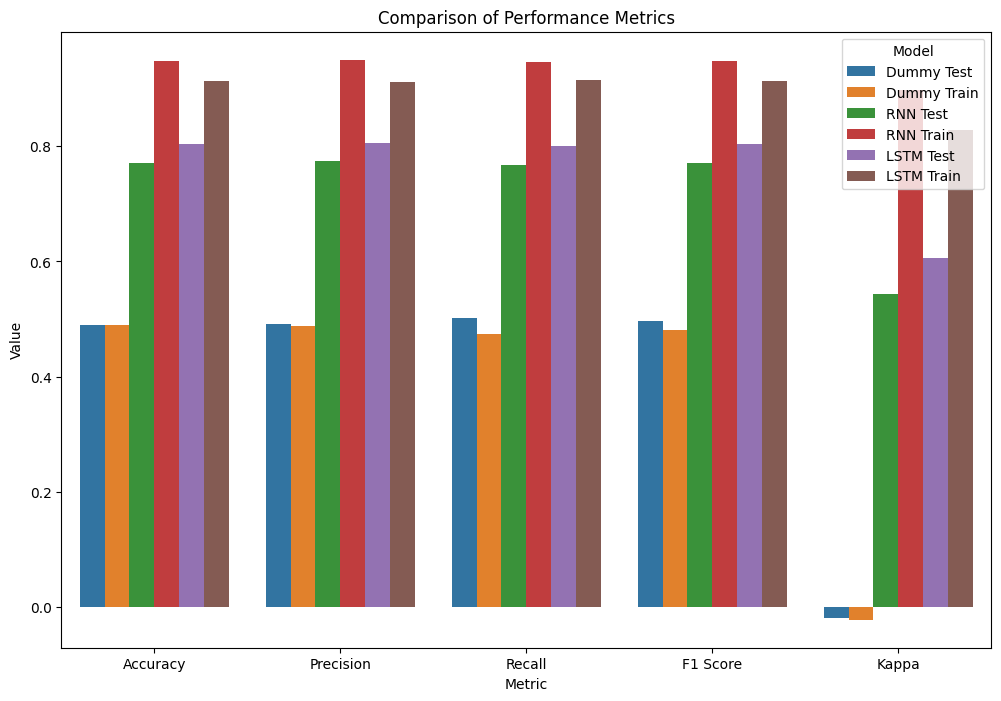

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame with metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa'],
    'Dummy Test': [accuracy_test_dummy, precision_test_dummy, recall_test_dummy, f1_test_dummy, kappa_test_dummy],
    'Dummy Train': [accuracy_train_dummy, precision_train_dummy, recall_train_dummy, f1_train_dummy, kappa_train_dummy],
    'RNN Test': [accuracy_test_rnn, precision_test_rnn, recall_test_rnn, f1_test_rnn, kappa_test_rnn],
    'RNN Train': [accuracy_rnn_train, precision_rnn_train, recall_rnn_train, f1_rnn_train, kappa_rnn_train],
    'LSTM Test': [accuracy_lstm_test, precision_lstm_test, recall_lstm_test, f1_lstm_test, kappa_lstm_test],
    'LSTM Train': [accuracy_lstm_train, precision_lstm_train, recall_lstm_train, f1_lstm_train, kappa_lstm_train],
})

# Bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='value', hue='Model', data=pd.melt(metrics_df, id_vars=['Metric'], var_name='Model', value_name='value'))
plt.title('Comparison of Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


In this case we see that in the metrics the Dummy model set tends to have the lowest values indicating lower performance. While the RNN and LSTM model behave better in the train sets but move away from the values of the test set, this could be indicating an overfitting.

###ROC Curves

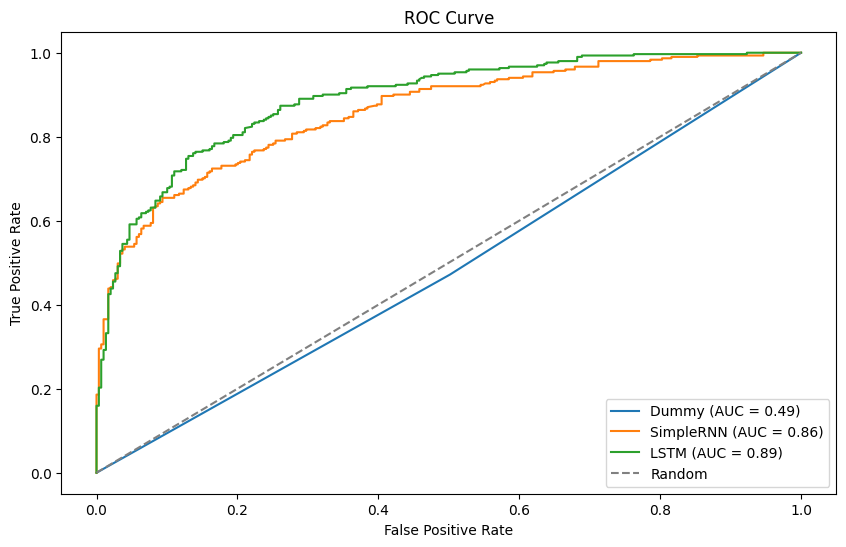

In [25]:
!pip install matplotlib seaborn
from sklearn.metrics import roc_curve, auc

# Calculate the ROC and AUC curves for each model.
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_clf.predict_proba(X_test)[:, 1])
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

fpr_rnn, tpr_rnn, _ = roc_curve(y_test, best_rnn_model.predict(X_test_pad))
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, best_lstm_model.predict(X_test_pad))
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Graph of ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy (AUC = {roc_auc_dummy:.2f})')
plt.plot(fpr_rnn, tpr_rnn, label=f'SimpleRNN (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


The ROC curve shows how the true positive rate and false positive rate change simultaneously as you vary the decision threshold of the model. A curve approaching the upper left corner indicates better performance, as it signifies high true positive rates and low false positive rates compared to other thresholds. In this case, we can say that the RNN model and the LSTM perform better than the Dummy. Being, the LSTM superior to the RNN.

An AUC close to 1 indicates a model with good performance, while an AUC close to 0.5 suggests that the model has difficulty discriminating between classes. Thus we see that the Dummy model has problems, it could be because of the chosen strategy. While RNN and LSTM are closer to 1.

The diagonal from (0,0) to (1,1) represents the performance of a random classifier. A model following this diagonal has no discriminative ability, hence Dummy with the chosen strategy does not discriminate between classes.

###Confusion Matrix

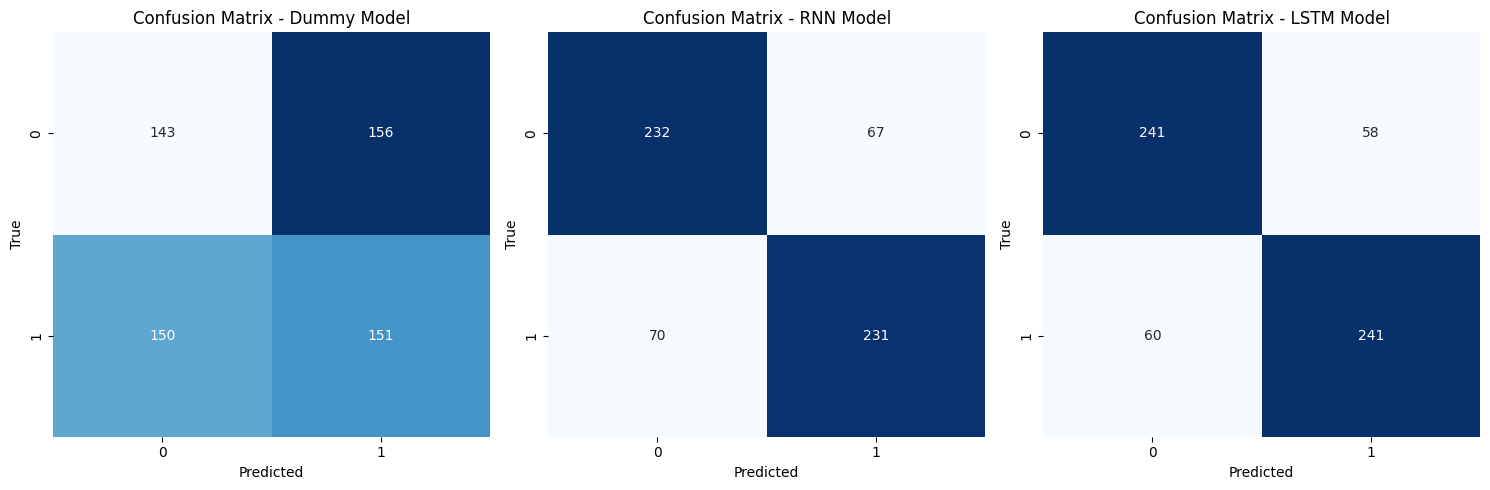

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener matrices de confusión para cada modelo
conf_matrix_dummy = confusion_matrix(y_test, y_pred_test)
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn_test)
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plotear matrices de confusión
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_dummy, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Dummy Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_rnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - RNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


This graph shows confusion matrices for each of your models (Dummy, RNN and LSTM). Each confusion matrix is divided into four quadrants, and each quadrant has a specific meaning:

* Upper Left Quadrant (True Negatives - TN): Shows the number of instances that actually belong to the negative class and were correctly classified as negative by the model.
* Upper Right Quadrant (False Positives - FP): Shows the number of instances that actually belong to the negative class, but were incorrectly classified as positive by the model.
* Lower Left Lower Quadrant (False Negatives - FN): Shows the number of instances that actually belong to the positive class, but were incorrectly classified as negative by the model.
* Lower Right Quadrant (True Positives - TP): Shows the number of instances that actually belong to the positive class and were correctly classified as positive by the model.

Each cell of the matrix contains the count of instances that fall into the corresponding category. The color of the cell indicates the magnitude of that count, where darker colors usually indicate higher values.

**Interpreting confusion matrices:**

* Dummy Model:The dummy model, being stratified, should have values relatively evenly distributed throughout the matrix. Therefore, similar numbers are seen in all four quadrants.

* RNN Model and LSTM Model:
In these models, higher numbers are seen in the main diagonal (TN and TP) and low numbers in the other quadrants, indicating that the model is correctly classifying both negative and positive instances.

###Training Time

In [33]:
import time

# Medir el tiempo de entrenamiento para el modelo Dummy
start_time = time.time()
dummy_clf.fit(X_train, y_train)
dummy_training_time = time.time() - start_time

# Medir el tiempo de entrenamiento para el modelo RNN
start_time = time.time()
best_rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=best_batch_size, validation_split=0.2)
rnn_training_time = time.time() - start_time

# Medir el tiempo de entrenamiento para el modelo LSTM
start_time = time.time()
best_lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=best_batch_size, validation_split=0.2)
lstm_training_time = time.time() - start_time

# Mostrar los tiempos de entrenamiento
print(f"Training Time - Dummy Model: {dummy_training_time:.2f} seconds")
print(f"Training Time - RNN Model: {rnn_training_time:.2f} seconds")
print(f"Training Time - LSTM Model: {lstm_training_time:.2f} seconds")


Epoch 1/5
60/60 [==============================] - 5s 91ms/step - loss: 0.0597 - accuracy: 0.9880 - val_loss: 0.5569 - val_accuracy: 0.8021
Epoch 2/5
60/60 [==============================] - 10s 169ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.6420 - val_accuracy: 0.7792
Epoch 3/5
60/60 [==============================] - 7s 110ms/step - loss: 0.3600 - accuracy: 0.9672 - val_loss: 0.6279 - val_accuracy: 0.6979
Epoch 4/5
60/60 [==============================] - 5s 91ms/step - loss: 0.2271 - accuracy: 0.9375 - val_loss: 0.5188 - val_accuracy: 0.7292
Epoch 5/5
60/60 [==============================] - 8s 133ms/step - loss: 0.1161 - accuracy: 0.9828 - val_loss: 0.5502 - val_accuracy: 0.7333
Epoch 1/5
60/60 [==============================] - 7s 111ms/step - loss: 0.3444 - accuracy: 0.9422 - val_loss: 0.5039 - val_accuracy: 0.7917
Epoch 2/5
60/60 [==============================] - 13s 221ms/step - loss: 0.2821 - accuracy: 0.9458 - val_loss: 0.5778 - val_accuracy: 0.7896
Epoch 3/5
60/

* Dummy Model Training Time:
This time represents how long it takes to train the Dummy model, which is a very simple model that uses the "most frequent" strategy.This time is low because the Dummy model has no parameters to fit and does not perform any meaningful calculations during training.

* RNN Model Training Time:
This time indicates how long it takes to train the RNN model, which is a more complex model with a recurrent neural network layer.The time pes higher compared to the Dummy model because the RNN has more parameters and performs more intensive computations during training.

* Training Time of the LSTM Model:
This time represents the time required to train the LSTM model, which is a type of recurrent neural network with long-term memory cells.
The training time is higher than that of the RNN model due to the higher complexity of the LSTM architecture.

**General Interpretation:**

Training time is an important factor to consider, especially in large data sets or in cases where many computational resources are required.
More complex and deeper models, such as RNN and LSTM models, tend to require more training time.

##Conclusion

Based on the metrics and visualizations provided, we can draw the following conclusions:

1. **Overall Performance:** 2.
   - The Dummy model, as expected, underperforms on all metrics compared to the more complex models, as it simply follows a simple strategy.
   - Both RNN and LSTM models outperform the Dummy model on all metrics in the test and training sets.

2. **Overfitting:**
   - Both RNN and LSTM models show slight overfitting in the training set, as their metrics are better in the training set compared to the test set. This could indicate that the models are capturing too much of the specific details of the training set and do not generalize as well on new data.

3. **Comparison between RNN and LSTM:**.
   - In general, the LSTM model tends to perform better compared to the RNN model in terms of metrics on both sets (training and test).
   - However, the training time of the LSTM model is slightly longer than that of the RNN model.

4. **Training Time**
   - The Dummy model has the lowest training time as it is a simple model with no significant adjustable parameters.- The RNN model has a lower training time compared to the LSTM model.

5. **Considerations.**
   - The choice of the best model will depend on the specific needs of the problem and the available resources.- If training time is prioritized and slightly lower performance is acceptable, the RNN model could be an option.
   - If better performance is sought at the expense of slightly longer training time, the LSTM model might be preferable.
   
In summary, the LSTM model could be considered the best in this context, as it achieves a better balance between performance and training time compared to the RNN model.However, this choice depends on project-specific priorities, such as the importance of performance versus training time.